In [1]:
import sys
import os
sys.path.append('./src/')
sys.path.append('./rcwa_pt/src/')
import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import solver_pt
import solver_metasurface_pt

# Results for the Near Field Design Case

This notebook can be used to read in and visualize results from metalens optimization runs.
Results produced by the other notebooks in this directory, for example "nearfield_optimization_pytorch.ipynb", are stored in log files in the ./results directory.

In [2]:
# Set this flag if you want to find the best result out of all those stored in ./results.
find_best = False

# Get list of files.
dirs = ['./results/nearfield_040822/', './results/nearfield_120822/', './results/nearfield_170822/']
files = [[os.path.join(d, f) for f in os.listdir(d) if os.path.isfile(os.path.join(d, f))] for d in dirs]
files = [f for d in files for f in d]

# Find the best result.
if find_best:
    eval_scores = [solver_metasurface_pt.load_result(f)['eval_score'] for f in files]
    idx_best = np.argmin(eval_scores)
    filename = files[idx_best]

# Otherwise, read a specific file.
filename = './results/nearfield_040822/nearfield-180x180-N50-sigmoid_update40.0-learning_rate0.8-initial_height0.txt'
print(filename)

result = solver_metasurface_pt.load_result(filename)

loss = result['loss']
focal_plane = result['focal_plane']
h = result['h']

batchSize = 1
pixelsX = h.shape[0]
pixelsY = h.shape[1]
Nlay = 6
Nx = 16
Ny = 16
ers = 11.9
urd = 1.0
eps_min = 1.0
eps_max = 11.9
sigmoid_coeff = result['hyperparameters'][1] + 1

params = {'batchSize' : batchSize,
         'pixelsX' : pixelsX,
         'pixelsY' : pixelsY,
         'Nlay' : Nlay,
         'Nx' : Nx,
         'Ny' : Ny,
         'ers' : ers,
         'urd' : urd,
         'eps_min' : eps_min,
         'eps_max' : eps_max,
         'sigmoid_coeff' : sigmoid_coeff}
print(params)

./results/farfield_040822/farfield-180x180-N50-sigmoid_update40.0-learning_rate0.8-initial_height0.txt
{'batchSize': 1, 'pixelsX': 180, 'pixelsY': 180, 'Nlay': 6, 'Nx': 16, 'Ny': 16, 'ers': 11.9, 'urd': 1.0, 'eps_min': 1.0, 'eps_max': 11.9, 'sigmoid_coeff': 41.0}


## Plot Loss

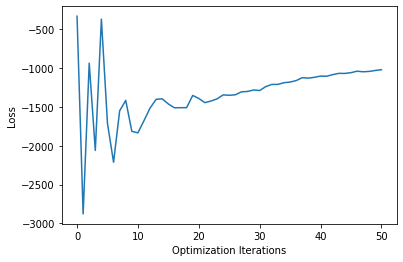

In [3]:
plt.plot(loss)
plt.xlabel('Optimization Iterations')
plt.ylabel('Loss')
plt.show()

## Focal Plane

In [1]:
fig = plt.imshow(torch.abs(focal_plane[0, :, :]) ** 2)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

NameError: name 'plt' is not defined

## Focal Plane Cross Sections

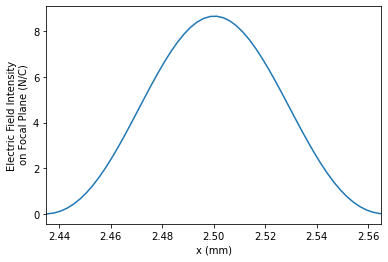

In [5]:
index = (pixelsY * 11) // 2
x = np.linspace(0, 5, focal_plane.shape[2])
plt.plot(x, torch.abs(focal_plane[0, index, :]) ** 2)
plt.xlabel('x (mm)')
plt.ylabel('Electric Field Intensity\n on Focal Plane (N/C)')
plt.xlim(2.435,2.565)
plt.show()

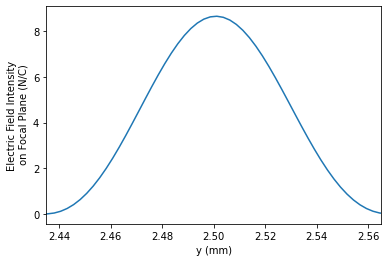

In [6]:
index = (pixelsX * 11) // 2
x = np.linspace(0, 5, focal_plane.shape[2])
plt.plot(x, torch.abs(focal_plane[0, :, index]) ** 2)
plt.xlabel('y (mm)')
plt.ylabel('Electric Field Intensity\n on Focal Plane (N/C)')
plt.xlim(2.435,2.565)
plt.show()

## Device Shape

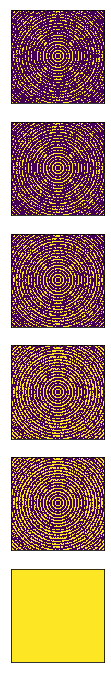

In [7]:
ER_t, UR_t = solver_metasurface_pt.generate_layered_metasurface(h, params)
solver_metasurface_pt.display_layered_metasurface(ER_t, params)